In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import Markdown as md
from datetime import date, datetime
%matplotlib inline
#sns.set(rc={"figure.figsize":(20, 20)})

from pandas import DataFrame
from typing import List

2. Genera las columnas adicionales y luego expórtelas en un archivo synthetic_features.csv :

* ○ temporada_alta : 1 si Fecha-I está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no.
* ○ dif_min : diferencia en minutos entre Fecha-O y Fecha-I .
* ○ atraso_15 : 1 si dif_min > 15, 0 si no.
* ○ periodo_dia : mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a Fecha-I .

In [2]:
df = pd.read_csv("../sources/raw/dataset_SCL.csv", dtype={'Vlo-O':str, 'Vlo-I':str})
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


In [3]:
# COLUMNS
FECHAI = 'Fecha-I'
FECHAO = 'Fecha-O'
TEMPORADA_ALTA = 'temporada_alta'
DIF_MIN = 'dif_min'
ATRASO_15 = 'atraso_15'
PERIODO_DIA = 'periodo_dia'
MORNING = 'mañana'
AFTERNOON = 'tarde'
NIGHT = 'noche'


DATE = 'Date'
TIME = 'time'
HOUR = 'hour'
MINUTE = 'minute'

columns = [TEMPORADA_ALTA, DIF_MIN, ATRASO_15, PERIODO_DIA]

In [4]:
df[FECHAI] = pd.to_datetime(df[FECHAI])
df[FECHAO] = pd.to_datetime(df[FECHAO])

In [5]:
df[DATE] = df['Fecha-I'].dt.date
df[TIME] = df['Fecha-I'].dt.time
df[HOUR] = df['Fecha-I'].dt.hour
df[MINUTE] = df['Fecha-I'].dt.minute

In [6]:
def convert_str_to_date(str_date: str) -> datetime:
    """convert string to date format '%Y-%m-%d'

    Args:
        str_date (str): string ex: '2017-01-01'

    Returns:
        datetime: string with datetime type
    """
    return datetime.strptime(str_date, '%Y-%m-%d').date()

def convert_str_to_time(str_date: str) -> datetime:
    """convert string to time format '%H:%M'

    Args:
        str_date (str): string '23:59'

    Returns:
        datetime: string with datetime type
    """
    return datetime.strptime(str_date, '%H:%M').time()

def add_temporada_alta_flag(df: DataFrame, dates: List) -> DataFrame:
    """Add temporada alta flag according to array of dates

    Args:
        df (DataFrame): _description_
        dates (List): _description_

    Returns:
        DataFrame: _description_
    """
    df[TEMPORADA_ALTA] = 0
    for date in dates:
        df.loc[(df[DATE] >= date[0]) & (df[DATE]<=date[1]), TEMPORADA_ALTA] = 1
    return df.copy()
def add_periodo_dia_flag(df: DataFrame, times: List) -> DataFrame:
    """Add temporada alta flag according to array of dates

    Args:
        df (DataFrame): _description_
        dates (List): _description_

    Returns:
        DataFrame: _description_
    """
    # default
    df[PERIODO_DIA] = NIGHT
    df.loc[(df[TIME] >= times[0][0]) & (df[TIME]<=times[0][1]), PERIODO_DIA] = MORNING
    df.loc[(df[TIME] >= times[1][0]) & (df[TIME]<=times[1][1]), PERIODO_DIA] = AFTERNOON
    return df.copy()

In [7]:
str_winter_start = '2017-12-15'
str_winter_end = '2017-12-31'
str_winter_bis_start = '2017-01-01'
str_winter_bis_end = '2017-03-03'
str_July_start = '2017-07-15'
str_July_end = '2017-07-31'
str_Sept_start = '2017-09-11'
str_Sept_end = '2017-09-30'

str_winter_start = convert_str_to_date(str_winter_start)
str_winter_end = convert_str_to_date(str_winter_end)
str_winter_bis_start = convert_str_to_date(str_winter_bis_start)
str_winter_bis_end = convert_str_to_date(str_winter_bis_end)
str_July_start = convert_str_to_date(str_July_start)
str_July_end = convert_str_to_date(str_July_end)
str_Sept_start = convert_str_to_date(str_Sept_start)
str_Sept_end = convert_str_to_date(str_Sept_end)

dates = [[str_winter_start, str_winter_end],
         [str_winter_bis_start, str_winter_bis_end],
         [str_July_start, str_July_end],
         [str_Sept_start, str_Sept_end]]

In [8]:
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,Date,time,hour,minute
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,2017,Domingo,I,American Airlines,Santiago,Miami,2017-01-01,23:30:00,23,30
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,2017,Lunes,I,American Airlines,Santiago,Miami,2017-01-02,23:30:00,23,30
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,2017,Martes,I,American Airlines,Santiago,Miami,2017-01-03,23:30:00,23,30
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,2017,Miercoles,I,American Airlines,Santiago,Miami,2017-01-04,23:30:00,23,30
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,2017,Jueves,I,American Airlines,Santiago,Miami,2017-01-05,23:30:00,23,30


In [9]:
add_temporada_alta_flag(df, dates)

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,Date,time,hour,minute,temporada_alta
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,Domingo,I,American Airlines,Santiago,Miami,2017-01-01,23:30:00,23,30,1
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,Lunes,I,American Airlines,Santiago,Miami,2017-01-02,23:30:00,23,30,1
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,Martes,I,American Airlines,Santiago,Miami,2017-01-03,23:30:00,23,30,1
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,Miercoles,I,American Airlines,Santiago,Miami,2017-01-04,23:30:00,23,30,1
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,Jueves,I,American Airlines,Santiago,Miami,2017-01-05,23:30:00,23,30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,...,Viernes,I,JetSmart SPA,Santiago,Lima,2017-12-22,14:55:00,14,55,1
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,...,Lunes,I,JetSmart SPA,Santiago,Lima,2017-12-25,14:55:00,14,55,1
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,...,Miercoles,I,JetSmart SPA,Santiago,Lima,2017-12-27,14:55:00,14,55,1
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,...,Viernes,I,JetSmart SPA,Santiago,Lima,2017-12-29,14:55:00,14,55,1


In [10]:
df[DIF_MIN] = df[FECHAO]-df[FECHAI]

In [11]:
df[DIF_MIN] = df['dif_min'].dt.total_seconds()//60
df[ATRASO_15] = 0
df.loc[df[DIF_MIN]>15, ATRASO_15] = 1

In [12]:
# periodo_dia : mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59)
#y noche (entre 19:00 y 4:59), en base a Fecha-I


In [13]:
str_mañana_start= '5:00'
str_mañana_end = '11:59'
str_tarde_start = '12:00'
str_tarde_end = '18:59'
# str_noche_start_1 = '19:00'
# str_noche_start_2 = '00:00'
# str_noche_end_1 = '23:59'
# str_noche_end_2 = '4:59'

str_mañana_start = convert_str_to_time(str_mañana_start)
str_mañana_end = convert_str_to_time(str_mañana_end)
str_tarde_start = convert_str_to_time(str_tarde_start)
str_tarde_end = convert_str_to_time(str_tarde_end)
times = [[str_mañana_start, str_mañana_end],
         [str_tarde_start, str_tarde_end],
#         [str_noche_start_1, str_noche_end_1],
#         [str_noche_start_2, str_noche_end_2]
        ]

In [14]:
str_mañana_start

datetime.time(5, 0)

In [15]:
add_periodo_dia_flag(df, times)

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,SIGLAORI,SIGLADES,Date,time,hour,minute,temporada_alta,dif_min,atraso_15,periodo_dia
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,Santiago,Miami,2017-01-01,23:30:00,23,30,1,3.0,0,noche
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,Santiago,Miami,2017-01-02,23:30:00,23,30,1,9.0,0,noche
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,Santiago,Miami,2017-01-03,23:30:00,23,30,1,9.0,0,noche
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,Santiago,Miami,2017-01-04,23:30:00,23,30,1,3.0,0,noche
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,Santiago,Miami,2017-01-05,23:30:00,23,30,1,-3.0,0,noche
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,...,Santiago,Lima,2017-12-22,14:55:00,14,55,1,46.0,1,tarde
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,...,Santiago,Lima,2017-12-25,14:55:00,14,55,1,16.0,1,tarde
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,...,Santiago,Lima,2017-12-27,14:55:00,14,55,1,40.0,1,tarde
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,...,Santiago,Lima,2017-12-29,14:55:00,14,55,1,13.0,0,tarde


In [16]:
df.temporada_alta.value_counts()

0    45444
1    22762
Name: temporada_alta, dtype: int64

In [17]:
df.periodo_dia.value_counts()

tarde     25506
mañana    25352
noche     17348
Name: periodo_dia, dtype: int64

In [49]:
df["Early"] = df[DIF_MIN].shift(-1)
df.loc[df["Early"]>=0, 'AnteriorEarly'] = 0
df.loc[df["Early"]<0, 'AnteriorEarly'] = 1

In [51]:
df2 = df.sort_values(FECHAI)
df2.reset_index(inplace=True, drop=True)

In [52]:
df2['deltaF'] = df2[FECHAI].diff()

In [53]:
df2.groupby('deltaF')['deltaF'].count()

deltaF
0 days 00:00:00    14954
0 days 00:01:00     2098
0 days 00:02:00     2033
0 days 00:03:00     1736
0 days 00:04:00     1918
                   ...  
0 days 02:25:00        1
0 days 02:30:00        4
0 days 02:35:00        2
0 days 02:50:00        1
0 days 03:02:00        1
Name: deltaF, Length: 102, dtype: int64

In [39]:
df2 = df.sort_values(FECHAI)
df2.reset_index(inplace=True, drop=True)

df2['deltaF'] = df2[DIF_MIN].diff()
#df2['deltaF_s']  = df2.deltaF.dt.seconds

In [40]:
df2.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,Date,time,hour,minute,temporada_alta,dif_min,atraso_15,periodo_dia,Early,deltaF
0,2017-01-01 00:15:00,11,SCEL,MMMX,AMX,2017-01-01 00:04:00,11,SCEL,MMMX,AMX,...,2017-01-01,00:15:00,0,15,1,-11.0,0,noche,1,NaN
1,2017-01-01 01:15:00,572,SCEL,SKBO,LAN,2017-01-01 01:10:00,572,SCEL,SKBO,LAN,...,2017-01-01,01:15:00,1,15,1,-5.0,0,noche,1,6.0
2,2017-01-01 01:23:00,495,SCEL,MPTO,CMP,2017-01-01 01:29:00,495,SCEL,MPTO,CMP,...,2017-01-01,01:23:00,1,23,1,6.0,0,noche,0,11.0
3,2017-01-01 01:33:00,240,SCEL,SKBO,AVA,2017-01-01 01:38:00,240,SCEL,SKBO,AVA,...,2017-01-01,01:33:00,1,33,1,5.0,0,noche,0,-1.0
4,2017-01-01 01:42:00,276,SCEL,MPTO,CMP,2017-01-01 01:40:00,276,SCEL,MPTO,CMP,...,2017-01-01,01:42:00,1,42,1,-3.0,0,noche,1,-8.0


In [35]:
df2.loc[(df2['deltaF_s'].isna()) & (df2[ATRASO_15]==1), 'deltaF_s'] = 15*60
df2.loc[(df2['deltaF_s'].isna()), 'deltaF_s'] = 0
df2['deltaF_s']  = df2.deltaF_s.astype(int)
df2['AnteriorDelay'] = 0
df2.loc[df2.deltaF_s>15*60, 'AnteriorDelay']= 1

del df2['deltaF']
del df2['deltaF_s']

In [36]:
df2

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,Date,time,hour,minute,temporada_alta,dif_min,atraso_15,periodo_dia,Early,AnteriorDelay
0,2017-01-01 00:15:00,11,SCEL,MMMX,AMX,2017-01-01 00:04:00,11,SCEL,MMMX,AMX,...,2017-01-01,00:15:00,0,15,1,-11.0,0,noche,1,0
1,2017-01-01 01:15:00,572,SCEL,SKBO,LAN,2017-01-01 01:10:00,572,SCEL,SKBO,LAN,...,2017-01-01,01:15:00,1,15,1,-5.0,0,noche,1,1
2,2017-01-01 01:23:00,495,SCEL,MPTO,CMP,2017-01-01 01:29:00,495,SCEL,MPTO,CMP,...,2017-01-01,01:23:00,1,23,1,6.0,0,noche,0,0
3,2017-01-01 01:33:00,240,SCEL,SKBO,AVA,2017-01-01 01:38:00,240,SCEL,SKBO,AVA,...,2017-01-01,01:33:00,1,33,1,5.0,0,noche,0,0
4,2017-01-01 01:42:00,276,SCEL,MPTO,CMP,2017-01-01 01:40:00,276,SCEL,MPTO,CMP,...,2017-01-01,01:42:00,1,42,1,-3.0,0,noche,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-31 23:30:00,532,SCEL,KJFK,LAN,2017-12-31 23:32:00,532.0,SCEL,KJFK,LAN,...,2017-12-31,23:30:00,23,30,1,2.0,0,noche,0,0
68202,2017-12-31 23:40:00,622,SCEL,MMMX,LAN,2018-01-01 00:12:00,622.0,SCEL,MMMX,LAN,...,2017-12-31,23:40:00,23,40,1,32.0,1,noche,0,0
68203,2017-12-31 23:45:00,11,SCEL,MMMX,AMX,2017-12-31 23:42:00,11,SCEL,MMMX,AMX,...,2017-12-31,23:45:00,23,45,1,-3.0,0,noche,1,0
68204,2017-12-31 23:55:00,602,SCEL,KLAX,LAN,2018-01-01 00:02:00,602.0,SCEL,KLAX,LAN,...,2017-12-31,23:55:00,23,55,1,7.0,0,noche,0,0


In [25]:
df2.AnteriorDelay.unique()

array([0, 1])

In [26]:
df2.AnteriorEarly.unique()

array([1, 0])

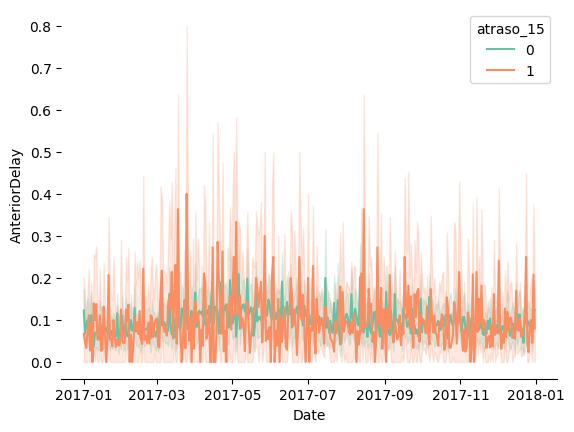

In [27]:
sns.lineplot(x=DATE, y = 'AnteriorDelay', data = df2, hue=ATRASO_15, palette = sns.color_palette("Set2",2))# palette = sns.color_palette("Paired",1))
sns.despine(left=True)

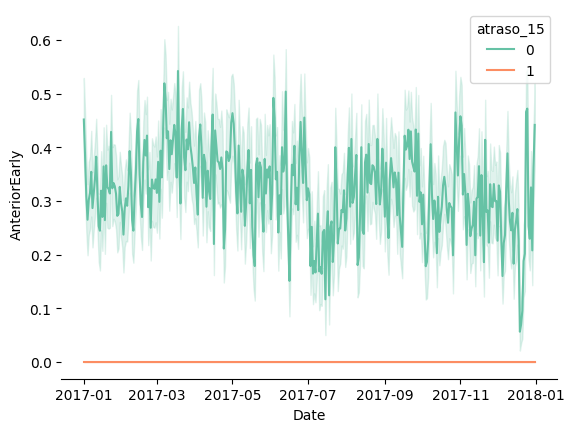

In [28]:
sns.lineplot(x=DATE, y = 'AnteriorEarly', data = df2, hue=ATRASO_15, palette = sns.color_palette("Set2",2))# palette = sns.color_palette("Paired",1))
sns.despine(left=True)

In [29]:
df3 = df.copy()
df3['Early'] = 0
df3.loc[df3[DIF_MIN]<0, 'Early'] = 1
df2['deltaF'] = df2[FECHAI].diff()
df2['deltaF_s']  = df2.deltaF.dt.seconds
df2.loc[(df2['deltaF_s'].isna()) & (df2[ATRASO_15]==1), 'deltaF_s'] = 15*60
df2.loc[(df2['deltaF_s'].isna()), 'deltaF_s'] = 0
df2['deltaF_s']  = df2.deltaF_s.astype(int)
df2['Anterior'] = 0
df2.loc[df2.deltaF_s>15*60, 'AnteriorDelay']= 1
del df2['deltaF']
del df2['deltaF_s']

In [133]:
df2[]
df2.reset_index(inplace=True, drop=True)
df2['deltaF'] = df2['atraso_15'].diff().rolling(1).sum()

In [141]:
df2.head(30)

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,Date,time,hour,minute,temporada_alta,dif_min,atraso_15,periodo_dia,deltaF,deltaF_s
0,2017-01-01 00:15:00,11,SCEL,MMMX,AMX,2017-01-01 00:04:00,11,SCEL,MMMX,AMX,...,2017-01-01,00:15:00,0,15,1,-11.0,0,noche,NaT,0
1,2017-01-01 01:15:00,572,SCEL,SKBO,LAN,2017-01-01 01:10:00,572,SCEL,SKBO,LAN,...,2017-01-01,01:15:00,1,15,1,-5.0,0,noche,0 days 01:00:00,3600
2,2017-01-01 01:23:00,495,SCEL,MPTO,CMP,2017-01-01 01:29:00,495,SCEL,MPTO,CMP,...,2017-01-01,01:23:00,1,23,1,6.0,0,noche,0 days 00:08:00,480
3,2017-01-01 01:33:00,240,SCEL,SKBO,AVA,2017-01-01 01:38:00,240,SCEL,SKBO,AVA,...,2017-01-01,01:33:00,1,33,1,5.0,0,noche,0 days 00:10:00,600
4,2017-01-01 01:42:00,276,SCEL,MPTO,CMP,2017-01-01 01:40:00,276,SCEL,MPTO,CMP,...,2017-01-01,01:42:00,1,42,1,-3.0,0,noche,0 days 00:09:00,540
5,2017-01-01 02:05:00,9245,SCEL,SBGL,GLO,2017-01-01 01:56:00,9245,SCEL,SBGL,GLO,...,2017-01-01,02:05:00,2,5,1,-9.0,0,noche,0 days 00:23:00,1380
6,2017-01-01 03:20:00,174,SCEL,MPTO,CMP,2017-01-01 03:14:00,174,SCEL,MPTO,CMP,...,2017-01-01,03:20:00,3,20,1,-6.0,0,noche,0 days 01:15:00,4500
7,2017-01-01 05:15:00,2636,SCEL,SPJC,LAN,2017-01-01 05:11:00,2636,SCEL,SPJC,LPE,...,2017-01-01,05:15:00,5,15,1,-5.0,0,mañana,0 days 01:55:00,6900
8,2017-01-01 05:50:00,802,SCEL,SPJC,SKU,2017-01-01 05:55:00,802,SCEL,SPJC,SKU,...,2017-01-01,05:50:00,5,50,1,5.0,0,mañana,0 days 00:35:00,2100
9,2017-01-01 05:51:00,112,SCEL,MPTO,CMP,2017-01-01 05:48:00,112,SCEL,MPTO,CMP,...,2017-01-01,05:51:00,5,51,1,-3.0,0,mañana,0 days 00:01:00,60


In [98]:
df2.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,Date,time,hour,minute,temporada_alta,dif_min,atraso_15,periodo_dia,deltaF,deltaF_s
0,2017-01-01 00:15:00,11,SCEL,MMMX,AMX,2017-01-01 00:04:00,11,SCEL,MMMX,AMX,...,2017-01-01,00:15:00,0,15,1,-11.0,0,noche,NaT,NaN
1,2017-01-01 01:15:00,572,SCEL,SKBO,LAN,2017-01-01 01:10:00,572,SCEL,SKBO,LAN,...,2017-01-01,01:15:00,1,15,1,-5.0,0,noche,0 days 01:00:00,3600.0
2,2017-01-01 01:23:00,495,SCEL,MPTO,CMP,2017-01-01 01:29:00,495,SCEL,MPTO,CMP,...,2017-01-01,01:23:00,1,23,1,6.0,0,noche,0 days 00:08:00,480.0
3,2017-01-01 01:33:00,240,SCEL,SKBO,AVA,2017-01-01 01:38:00,240,SCEL,SKBO,AVA,...,2017-01-01,01:33:00,1,33,1,5.0,0,noche,0 days 00:10:00,600.0
4,2017-01-01 01:42:00,276,SCEL,MPTO,CMP,2017-01-01 01:40:00,276,SCEL,MPTO,CMP,...,2017-01-01,01:42:00,1,42,1,-3.0,0,noche,0 days 00:09:00,540.0


In [94]:
df[columns]

,temporada_alta,dif_min,atraso_15,periodo_dia
0,1,3.0,0,noche
1,1,9.0,0,noche
2,1,9.0,0,noche
3,1,3.0,0,noche
4,1,-3.0,0,noche
...,...,...,...,...
68201,1,46.0,1,tarde
68202,1,16.0,1,tarde
68203,1,40.0,1,tarde
68204,1,13.0,0,tarde


In [21]:
df[columns].to_csv('synthetic_features.csv',index= False)